In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitudes and longitutde combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-86.53529513301444 67.19821617661088
-80.23732781137042 49.13146689060267
40.507438774087575 -71.0641623891024
-46.23301874206982 -14.897692115547557
21.581785807722014 -104.84665197713542
-84.70396165374758 87.70353493927439
11.725032359018243 -122.44161759174364
-22.431411204419618 -25.213833952821147
22.74165079377333 -148.75864178746878
-76.36018226316901 99.75245321570509
-81.16688400801416 -169.3191148455787
15.19885853185076 3.1781218479384847
-66.21750000500579 -62.53083986339617
50.595153918580905 67.68381300173237
49.811615972343986 -41.933079557293155
-3.5896030198466065 -101.7460571366216
22.870595514652237 143.76331109089278
-8.385351499859496 86.96700912665472
-71.14977500307197 -105.611957695515
84.89427590171684 -82.49231077829296
43.637593039523466 152.45495218088467
-1.1217773772790594 -74.38788233351505
23.70517858184253 36.686945098132526
85.5637959593227 173.13897025297388
-64.03101903989793 7.66115409011789
10.037686772261452 -14.289760436266846
65.11658238798177 

-85.8358944966369 56.65196907412121
-46.527703320800434 172.04813765366998
17.24429494539629 -85.00686398418229
26.940928247349675 101.60888890037432
-52.65236555964992 -38.308713617587216
61.026307226943175 -179.47096908862048
25.293757677053748 67.44561981194761
-74.84640835440567 -103.85423600745773
57.05725030992926 -26.608182376607942
-17.539093168603344 1.8518028685513457
-76.44506396292546 55.542885197544905
-34.13198111975064 86.73110040408227
2.7295666847239346 91.0397657355673
15.670742674271821 -7.378174932466237
75.02995813151648 -116.10852440757003
-71.40357324669819 108.62889023067709
-22.3354385581237 104.80051760275518
18.705910008544038 25.590253472668593
9.08894949849359 -12.714397834333596
-3.923810171218207 114.61189717832781
79.92603371825734 -102.89761582628788
-79.00582175245444 -164.76380870025187
63.86165152225104 -109.16311431909816
-61.01895566848657 -45.21275706816439
-5.190677781305169 -45.81363683882472
-41.22168295343623 -83.0162344976531
-4.0085819542303

In [5]:
# Import the citipy module
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
# print(cities)
len(cities)



609

In [7]:
# Import the requests library
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes. 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | newport
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | puga
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | caravelas
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | filingue
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | atbasar
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | tateyama
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of 

Processing Record 38 of Set 4 | avera
Processing Record 39 of Set 4 | slonim
Processing Record 40 of Set 4 | tevriz
Processing Record 41 of Set 4 | sunbury
Processing Record 42 of Set 4 | quang ngai
Processing Record 43 of Set 4 | galveston
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | castro
Processing Record 47 of Set 4 | ukiah
Processing Record 48 of Set 4 | samusu
City not found. Skipping...
Processing Record 49 of Set 4 | santo antonio do sudoeste
Processing Record 50 of Set 4 | taoudenni
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | poum
Processing Record 3 of Set 5 | nara
Processing Record 4 of Set 5 | adrar
Processing Record 5 of Set 5 | saskylakh
Processing Record 6 of Set 5 | san fernando
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | potsdam
Processing Record 10 of Set 5 | vila franca do campo
Processing Record 11 of Set 

Processing Record 26 of Set 8 | vrangel
Processing Record 27 of Set 8 | devils lake
Processing Record 28 of Set 8 | daru
Processing Record 29 of Set 8 | bloemfontein
Processing Record 30 of Set 8 | lavrentiya
Processing Record 31 of Set 8 | honningsvag
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | belmopan
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | shingu
Processing Record 37 of Set 8 | pekalongan
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | ermelo
Processing Record 40 of Set 8 | baghdad
Processing Record 41 of Set 8 | sabha
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | mandal
Processing Record 44 of Set 8 | mandalgovi
Processing Record 45 of Set 8 | makakilo city
Processing Record 46 of Set 8 | saleaula
City not found. Skipping...
Processing Record 47 of Set 8 | chulman
Processing Record 48 of Set 8 | stokmarknes
Processing Rec

Processing Record 16 of Set 12 | naliya
Processing Record 17 of Set 12 | sinkat
City not found. Skipping...
Processing Record 18 of Set 12 | faya
Processing Record 19 of Set 12 | mikkeli
Processing Record 20 of Set 12 | qui nhon
Processing Record 21 of Set 12 | van
Processing Record 22 of Set 12 | catamarca
Processing Record 23 of Set 12 | shakiso
Processing Record 24 of Set 12 | anzio
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | genhe
Processing Record 27 of Set 12 | alice springs
Processing Record 28 of Set 12 | madinat sittah uktubar
Processing Record 29 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 12 | saldanha
Processing Record 31 of Set 12 | taltal
Processing Record 32 of Set 12 | verkhnyaya inta
Processing Record 33 of Set 12 | salacgriva
Processing Record 34 of Set 12 | kayes
Processing Record 35 of Set 12 | bumba
Processing Record 36 of Set 12 | svetlogorsk
Processing Record 37 of Set 12 | antalaha
Processing Reco

In [10]:
# Convery the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,62.44,81,84,7.40,ZA,2022-08-10 17:16:34
1,Newport,51.5877,-2.9984,90.39,29,8,6.24,GB,2022-08-10 17:14:52
2,Jamestown,42.0970,-79.2353,76.17,52,75,5.01,US,2022-08-10 17:14:46
3,Puga,21.5833,-104.8167,80.67,61,75,4.61,MX,2022-08-10 17:16:35
4,Busselton,-33.6500,115.3333,50.59,83,11,5.26,AU,2022-08-10 17:13:34
5,Cabo San Lucas,22.8909,-109.9124,94.60,68,0,5.75,MX,2022-08-10 17:16:26
6,Caravelas,-17.7125,-39.2481,79.16,58,6,14.74,BR,2022-08-10 17:16:35
7,Hilo,19.7297,-155.0900,75.61,90,75,4.61,US,2022-08-10 17:16:36
8,Albany,42.6001,-73.9662,76.68,67,58,4.41,US,2022-08-10 17:15:08
9,Vaini,-21.2000,-175.2000,77.16,94,20,11.50,TO,2022-08-10 17:16:36


In [11]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", 
                   "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-08-10 17:16:34,-33.5906,26.8910,62.44,81,84,7.40
1,Newport,GB,2022-08-10 17:14:52,51.5877,-2.9984,90.39,29,8,6.24
2,Jamestown,US,2022-08-10 17:14:46,42.0970,-79.2353,76.17,52,75,5.01
3,Puga,MX,2022-08-10 17:16:35,21.5833,-104.8167,80.67,61,75,4.61
4,Busselton,AU,2022-08-10 17:13:34,-33.6500,115.3333,50.59,83,11,5.26
5,Cabo San Lucas,MX,2022-08-10 17:16:26,22.8909,-109.9124,94.60,68,0,5.75
6,Caravelas,BR,2022-08-10 17:16:35,-17.7125,-39.2481,79.16,58,6,14.74
7,Hilo,US,2022-08-10 17:16:36,19.7297,-155.0900,75.61,90,75,4.61
8,Albany,US,2022-08-10 17:15:08,42.6001,-73.9662,76.68,67,58,4.41
9,Vaini,TO,2022-08-10 17:16:36,-21.2000,-175.2000,77.16,94,20,11.50


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City ID")

In [13]:
# Extract the relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

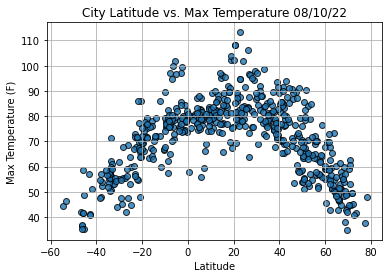

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

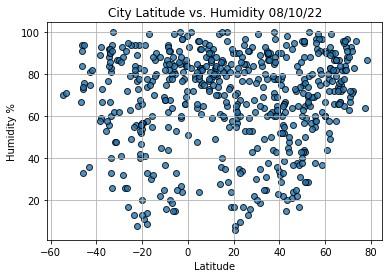

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

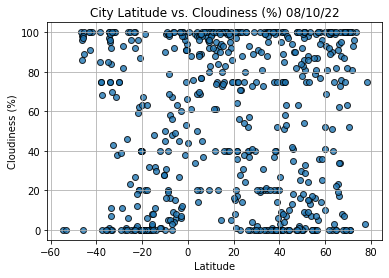

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

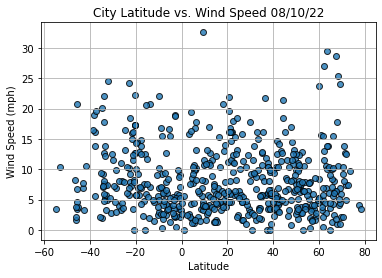

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Newport,GB,2022-08-10 17:14:52,51.5877,-2.9984,90.39,29,8,6.24
2,Jamestown,US,2022-08-10 17:14:46,42.0970,-79.2353,76.17,52,75,5.01
3,Puga,MX,2022-08-10 17:16:35,21.5833,-104.8167,80.67,61,75,4.61
5,Cabo San Lucas,MX,2022-08-10 17:16:26,22.8909,-109.9124,94.60,68,0,5.75
7,Hilo,US,2022-08-10 17:16:36,19.7297,-155.0900,75.61,90,75,4.61


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

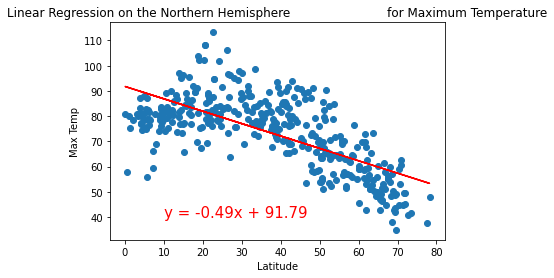

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

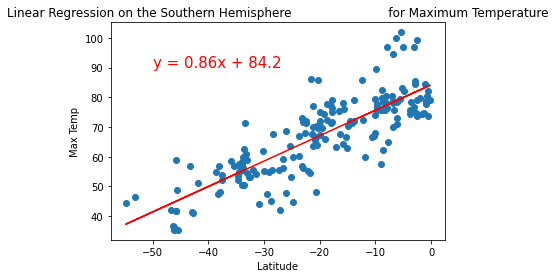

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

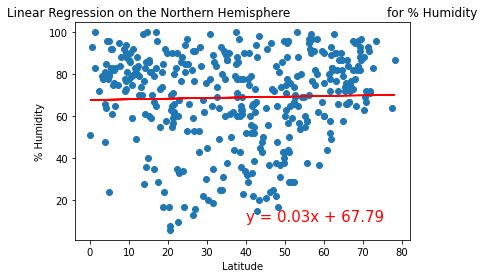

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

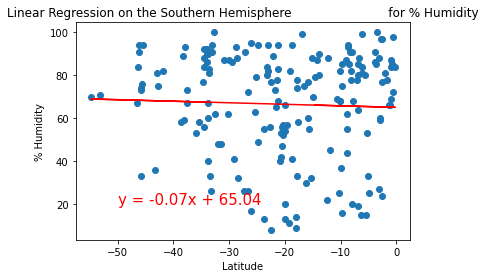

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

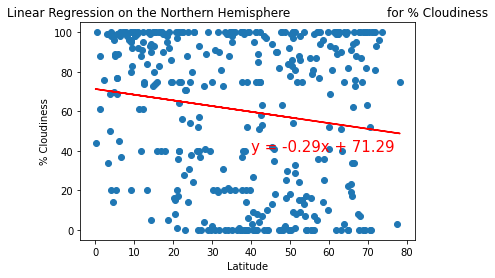

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

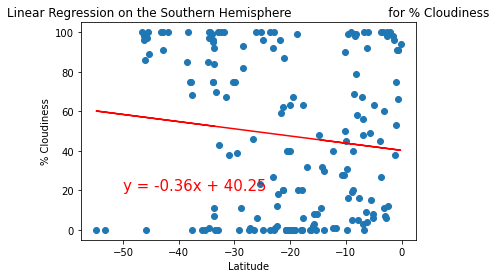

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

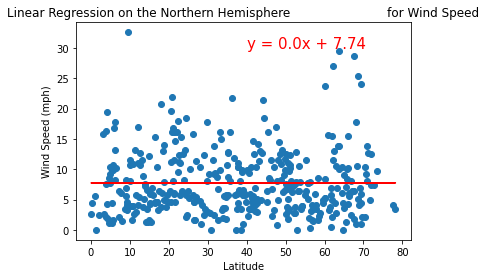

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,30))

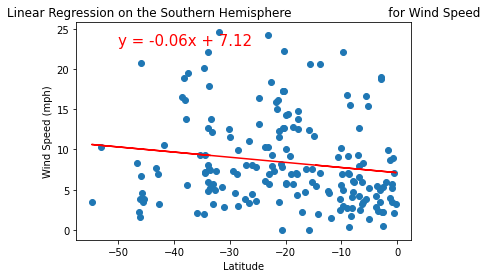

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,23))